# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)


In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand, lets visualize it

In [5]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


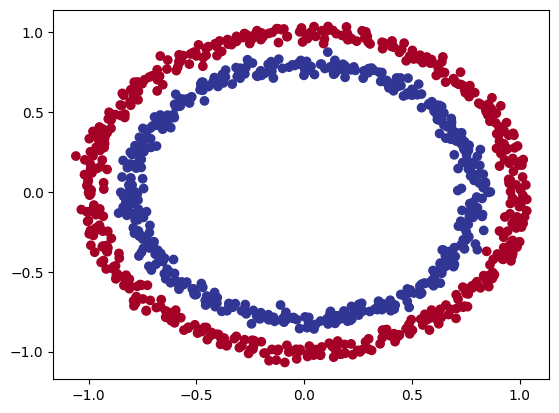

In [6]:
import matplotlib.pyplot as plt
 
plt.scatter(X[:, 0], X[:, 1], c=y[:], cmap=plt.cm.RdYlBu)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

In [8]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

history = model_1.fit(X, y, epochs=5)

model_1.evaluate(X, y)

Epoch 1/5
32/32 [==============================] - 0s 421us/step - loss: 5.2220 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 315us/step - loss: 4.3834 - accuracy: 0.4750
Epoch 3/5
32/32 [==============================] - 0s 319us/step - loss: 3.6089 - accuracy: 0.4810
Epoch 4/5
32/32 [==============================] - 0s 301us/step - loss: 0.9088 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 316us/step - loss: 0.7071 - accuracy: 0.4980


[0.7070568799972534, 0.49799999594688416]

In [9]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

history = model_2.fit(X, y, epochs=100)

model_2.evaluate(X, y)

Epoch 1/100
32/32 [==============================] - 0s 448us/step - loss: 5.4459 - accuracy: 0.5610
Epoch 2/100
32/32 [==============================] - 0s 379us/step - loss: 5.4036 - accuracy: 0.5220
Epoch 3/100
32/32 [==============================] - 0s 350us/step - loss: 6.6285 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 321us/step - loss: 6.6559 - accuracy: 0.5110
Epoch 5/100
32/32 [==============================] - 0s 330us/step - loss: 6.6211 - accuracy: 0.5130
Epoch 6/100
32/32 [==============================] - 0s 335us/step - loss: 6.1232 - accuracy: 0.5500
Epoch 7/100
32/32 [==============================] - 0s 324us/step - loss: 6.6222 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 316us/step - loss: 7.1142 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 328us/step - loss: 7.0601 - accuracy: 0.4970
Epoch 10/100
32/32 [==============================] - 0s 325us/step - loss: 6.9674 - accura

[0.6938320398330688, 0.42899999022483826]

### Using Activation functions

In [10]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

history = model_3.fit(X, y, epochs=100)

model_3.evaluate(X, y)

Epoch 1/100
32/32 [==============================] - 0s 476us/step - loss: 2.6434 - accuracy: 0.4500
Epoch 2/100
32/32 [==============================] - 0s 428us/step - loss: 0.7095 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 383us/step - loss: 0.6977 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 379us/step - loss: 0.6952 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 374us/step - loss: 0.6947 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 372us/step - loss: 0.6947 - accuracy: 0.4370
Epoch 7/100
32/32 [==============================] - 0s 380us/step - loss: 0.6945 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 373us/step - loss: 0.6953 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 370us/step - loss: 0.6961 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 371us/step - loss: 0.6946 - accura

[0.7004556655883789, 0.5040000081062317]

In [11]:
import numpy as np

In [12]:
def plot_decision_boundary(model, X, y):
  """Plots the decision boundary created by the `model` predicting from `X` to `y`.

  Args:
      model: model whose plotting should be done
      X: Input Data
      y: Labels
  """
  
  x_min = X[:, 0].min() - 0.1
  x_max = X[:, 0].max() + 0.1
  
  y_min = X[:, 1].min() - 0.1
  y_max = X[:, 1].max() + 0.1
  
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
  
  y_pred = model.predict(x_in)
  
  # Check for multiclass
  if(len(y_pred[0]) > 1):
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) 
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 227us/step
doing binary classification


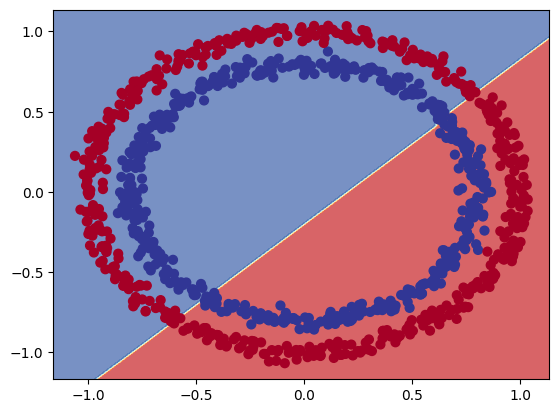

In [13]:
plot_decision_boundary(model_3, X, y)

Epoch 1/100
32/32 [==============================] - 0s 539us/step - loss: 5.2040 - accuracy: 0.0540
Epoch 2/100
32/32 [==============================] - 0s 449us/step - loss: 5.0279 - accuracy: 0.0350
Epoch 3/100
32/32 [==============================] - 0s 344us/step - loss: 4.9123 - accuracy: 0.0270
Epoch 4/100
32/32 [==============================] - 0s 342us/step - loss: 4.8653 - accuracy: 0.0300
Epoch 5/100
32/32 [==============================] - 0s 339us/step - loss: 4.8124 - accuracy: 0.0430
Epoch 6/100
32/32 [==============================] - 0s 340us/step - loss: 4.7152 - accuracy: 0.0550
Epoch 7/100
32/32 [==============================] - 0s 333us/step - loss: 4.6478 - accuracy: 0.0620
Epoch 8/100
32/32 [==============================] - 0s 336us/step - loss: 4.5348 - accuracy: 0.0760
Epoch 9/100
32/32 [==============================] - 0s 329us/step - loss: 4.4350 - accuracy: 0.0870
Epoch 10/100
32/32 [==============================] - 0s 339us/step - loss: 4.3572 - accura

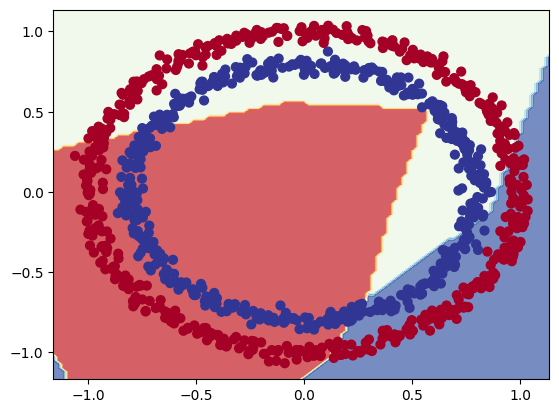

In [14]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

print(model_4.evaluate(X, y))

# pd.DataFrame(history.history).plot()
plot_decision_boundary(model_4, X, y)

32/32 [==============================] - 0s 357us/step - loss: 0.5597 - accuracy: 0.7200
[0.5596631765365601, 0.7200000286102295]
313/313 [==============================] - 0s 225us/step
doing binary classification


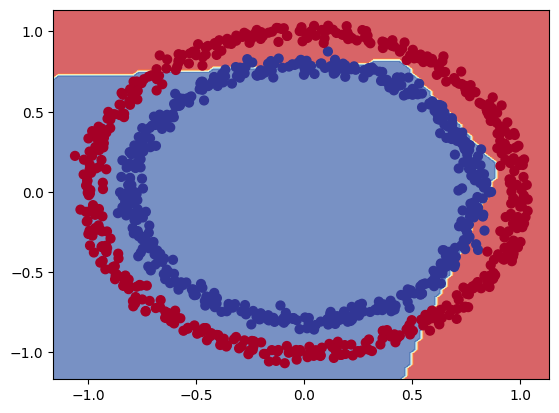

In [15]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100, verbose=0)

print(model_5.evaluate(X, y))

# pd.DataFrame(history.history).plot()
plot_decision_boundary(model_5, X, y)

### Trying out other activation functions

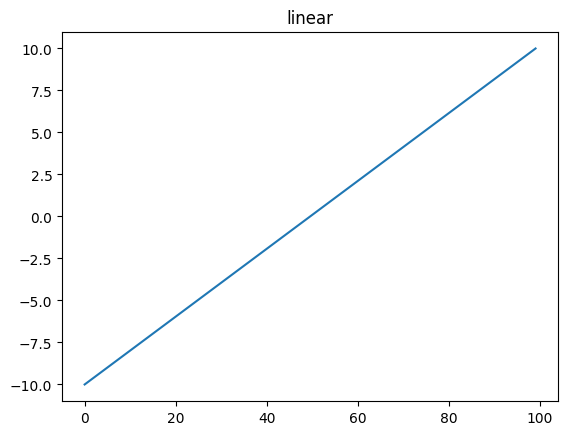

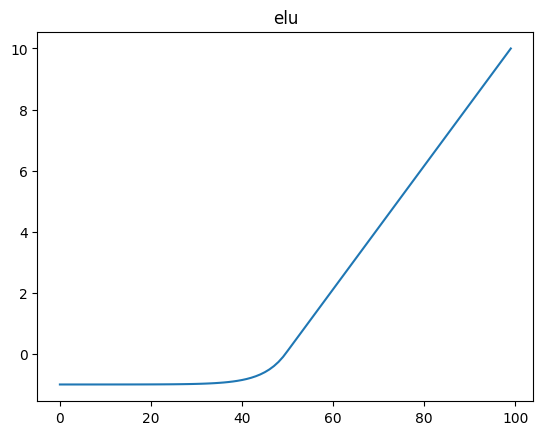

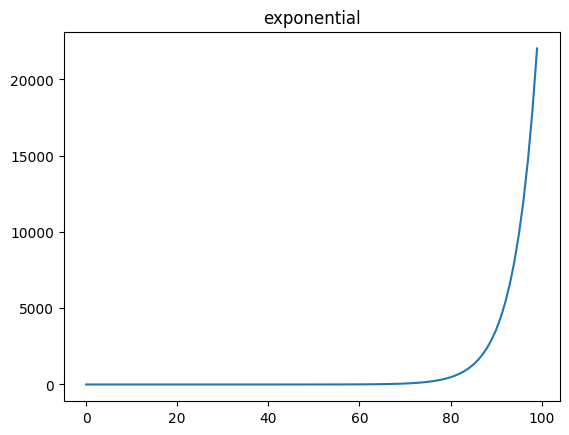

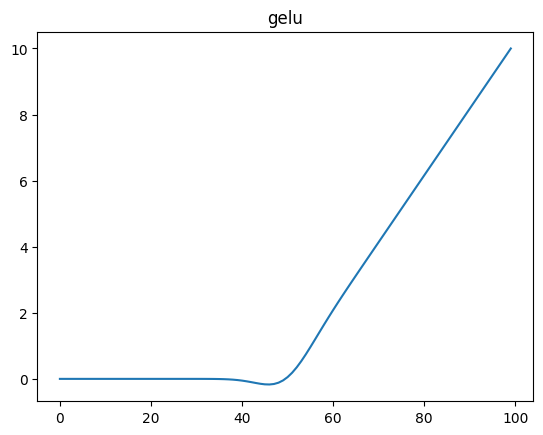

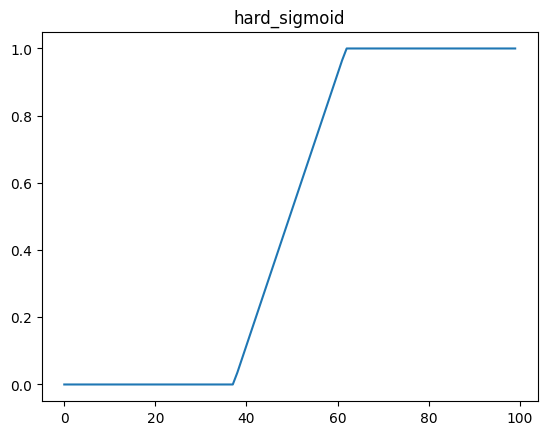

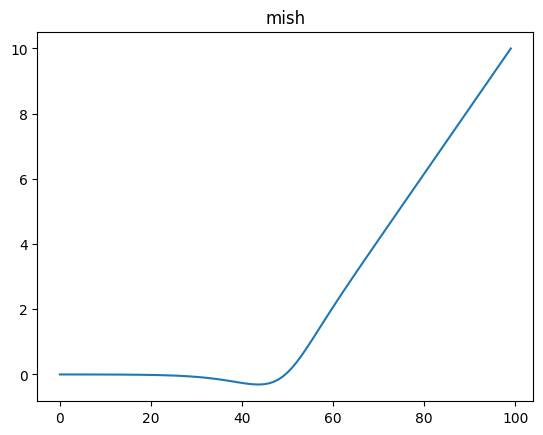

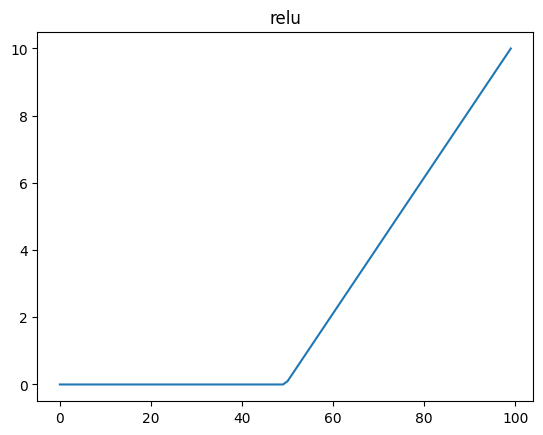

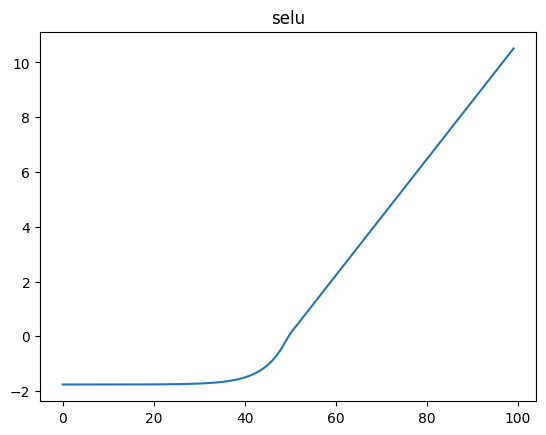

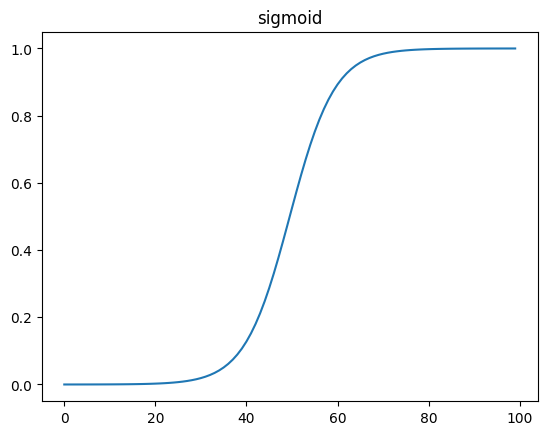

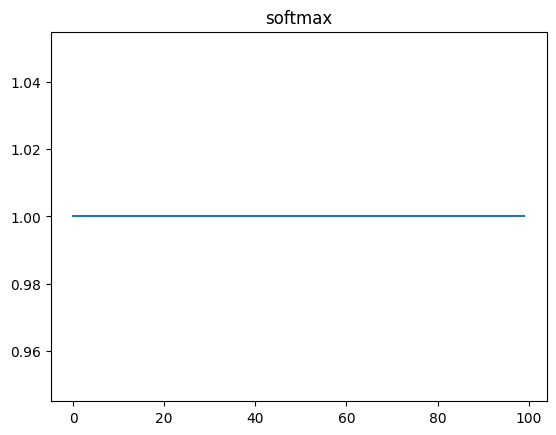

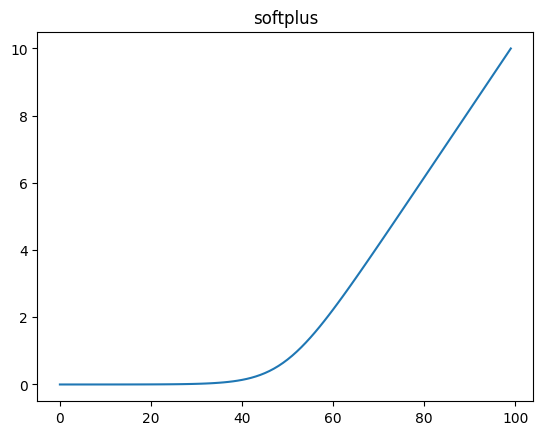

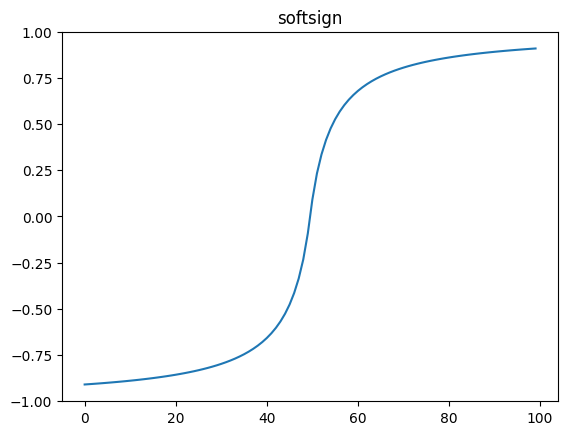

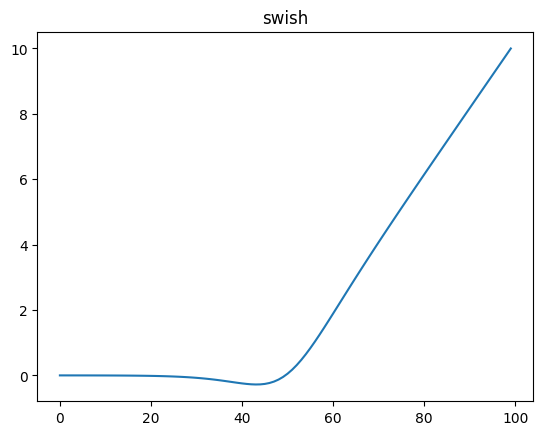

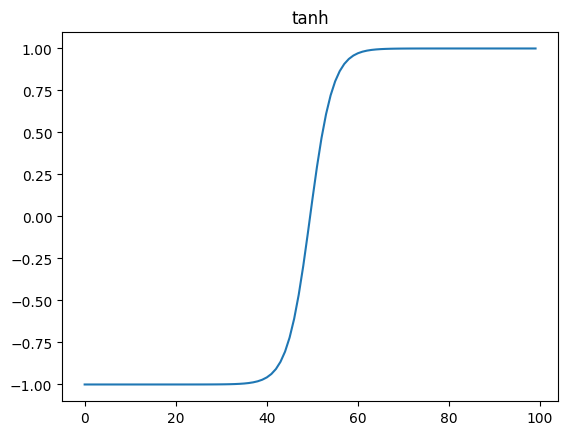

In [16]:
import tensorflow as tf

A = tf.linspace(-10.0, 10.0, 100)

funcs = [
    ("linear", tf.keras.activations.linear),
    ("elu", tf.keras.activations.elu),
    ("exponential", tf.keras.activations.exponential),
    ("gelu", tf.keras.activations.gelu),
    ("hard_sigmoid", tf.keras.activations.hard_sigmoid),
    ("mish", tf.keras.activations.mish),
    ("relu", tf.keras.activations.relu),
    ("selu", tf.keras.activations.selu),
    # ("serialize", tf.keras.activations.serialize),
    ("sigmoid", tf.keras.activations.sigmoid),
    ("softmax", tf.keras.activations.softmax),
    ("softplus", tf.keras.activations.softplus),
    ("softsign", tf.keras.activations.softsign),
    ("swish", tf.keras.activations.swish),
    ("tanh", tf.keras.activations.tanh),
]

for key, item in funcs:
    # print(key, tf.squeeze(item(tf.expand_dims(A, -1))))
    # plt.figure(figsize=(10, 7))
    plt.plot(tf.squeeze(item(tf.expand_dims(A, -1))))
    plt.title(key)
    plt.show();

## Evaluating and improving our classification model

In [17]:
# Splitting training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [18]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.005),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=100)

model_8.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 0s 472us/step - loss: 0.6921 - accuracy: 0.5200
Epoch 2/100
25/25 [==============================] - 0s 396us/step - loss: 0.6862 - accuracy: 0.5188
Epoch 3/100
25/25 [==============================] - 0s 359us/step - loss: 0.6843 - accuracy: 0.5300
Epoch 4/100
25/25 [==============================] - 0s 364us/step - loss: 0.6829 - accuracy: 0.5225


/Users/mufaddalhamid/Documents/Learn/TensorFlow/.conda/lib/python3.11/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 5/100
25/25 [==============================] - 0s 358us/step - loss: 0.6797 - accuracy: 0.5987
Epoch 6/100
25/25 [==============================] - 0s 324us/step - loss: 0.6758 - accuracy: 0.5975
Epoch 7/100
25/25 [==============================] - 0s 367us/step - loss: 0.6720 - accuracy: 0.5863
Epoch 8/100
25/25 [==============================] - 0s 359us/step - loss: 0.6682 - accuracy: 0.5788
Epoch 9/100
25/25 [==============================] - 0s 349us/step - loss: 0.6637 - accuracy: 0.5850
Epoch 10/100
25/25 [==============================] - 0s 345us/step - loss: 0.6611 - accuracy: 0.5975
Epoch 11/100
25/25 [==============================] - 0s 324us/step - loss: 0.6539 - accuracy: 0.6050
Epoch 12/100
25/25 [==============================] - 0s 335us/step - loss: 0.6474 - accuracy: 0.6050
Epoch 13/100
25/25 [==============================] - 0s 333us/step - loss: 0.6411 - accuracy: 0.6212
Epoch 14/100
25/25 [==============================] - 0s 334us/step - loss: 0.6342 - ac

[0.04201129078865051, 0.9950000047683716]

313/313 [==============================] - 0s 229us/step
doing binary classification
313/313 [==============================] - 0s 236us/step
doing binary classification


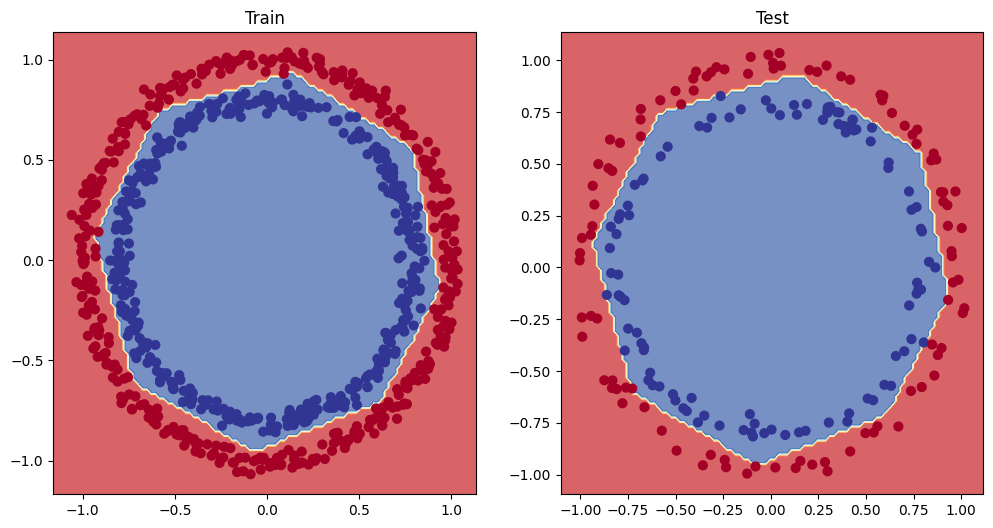

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();


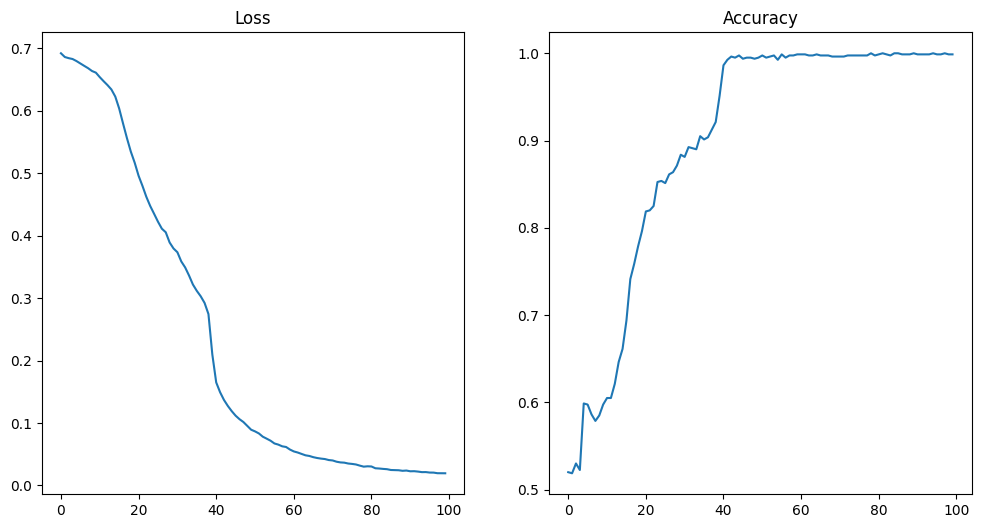

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(history.history["loss"], label="loss")
plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], label="accuracy")
plt.show();


## Finding the best learning rate

In [21]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 606us/step - loss: 0.6913 - accuracy: 0.4787 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 392us/step - loss: 0.6912 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 410us/step - loss: 0.6912 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 388us/step - loss: 0.6912 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 352us/step - loss: 0.6911 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 353us/step - loss: 0.6910 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 357us/step - loss: 0.6910 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 349us/step - loss: 0.6909 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: xlabel='epochs'>

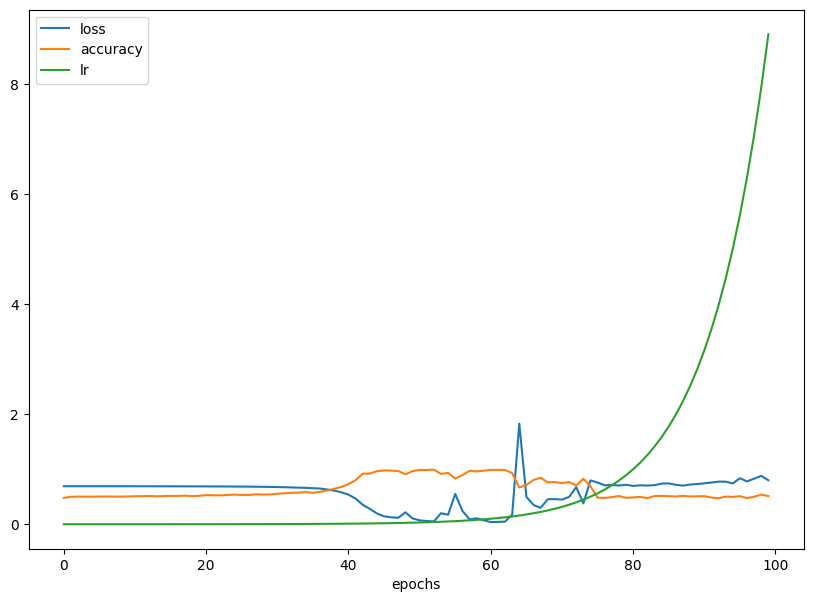

In [22]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

In [23]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
len(lrs)

100

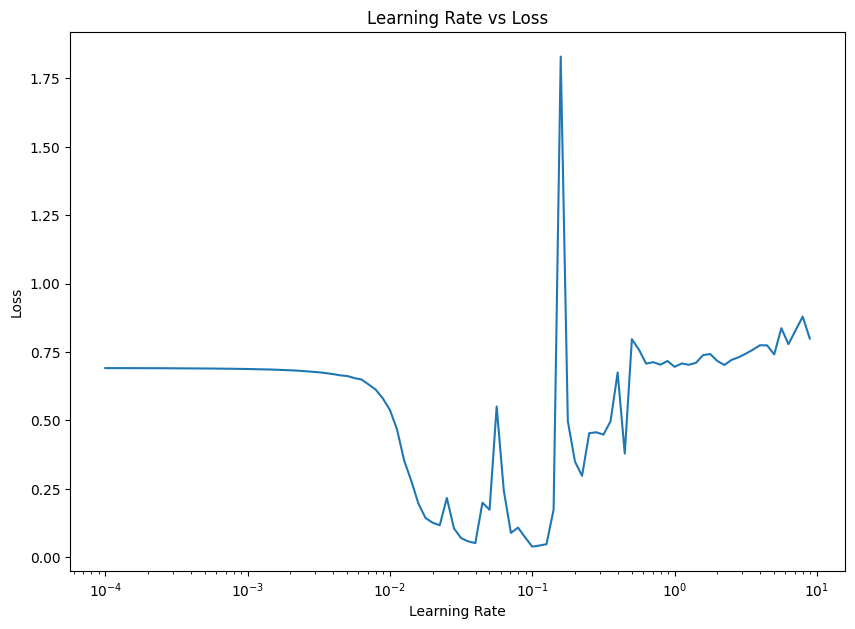

In [24]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show();


## More Classification Evaluation Methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* Classification report (sklearn)

In [47]:
# Check accuracy of model

loss,accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9950
Model loss on test set: 0.04201129078865051
Model accuracy on test set: 99.50%


In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model_8.predict(X_test)

7/7 [==============================] - 0s 669us/step


In [57]:
cm = confusion_matrix(y_test, tf.round(y_pred))
cm

array([[ 99,   1],
       [  0, 100]])

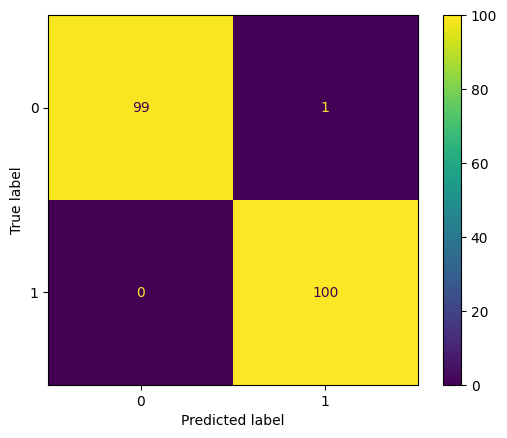

In [74]:
ConfusionMatrixDisplay(cm).plot()

# Working with a larger example (multiclass classification)

When you have more than 2 classes as option, then it is known as multiclass classification
* This means if you have 3 different classes, it is multiclass classification,
* Similary, if you have 100 different classes, it also multiclass classification

To practice multiclass classificatino, we will build neural network to classify images of different items of clothing.

In [189]:
import tensorflow as tf


(X_train_org, y_train_org), (X_test_org, y_test_org) = tf.keras.datasets.fashion_mnist.load_data()

labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

In [190]:
# for i in range(20):
#   plt.imshow(X_train_org[i], cmap=plt.cm.binary)
#   plt.title(f"Label: {labels[y_train_org[i]]}")
#   plt.show();
  

In [191]:
X_train_org.shape, y_train_org.shape

((60000, 28, 28), (60000,))

In [192]:
X_train = X_train_org
y_train = tf.one_hot(y_train_org, depth=10)

X_test = X_test_org
y_test = tf.one_hot(y_test_org, depth=10)

In [125]:
model_10 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

norm_non_history = model_10.fit(X_train_org, y_train_org, epochs=10, validation_data=(X_test_org, y_test_org))

Epoch 1/10
1875/1875 [==============================] - 1s 443us/step - loss: 2.6884 - accuracy: 0.1120 - val_loss: 2.2556 - val_accuracy: 0.1229
Epoch 2/10
1875/1875 [==============================] - 1s 403us/step - loss: 2.2216 - accuracy: 0.1394 - val_loss: 2.1758 - val_accuracy: 0.1566
Epoch 3/10
1875/1875 [==============================] - 1s 385us/step - loss: 2.0839 - accuracy: 0.1797 - val_loss: 1.8388 - val_accuracy: 0.2216
Epoch 4/10
1875/1875 [==============================] - 1s 384us/step - loss: 1.7182 - accuracy: 0.2560 - val_loss: 1.6464 - val_accuracy: 0.2915
Epoch 5/10
1875/1875 [==============================] - 1s 383us/step - loss: 1.5986 - accuracy: 0.3157 - val_loss: 1.5549 - val_accuracy: 0.3466
Epoch 6/10
1875/1875 [==============================] - 1s 385us/step - loss: 1.5231 - accuracy: 0.3579 - val_loss: 1.5307 - val_accuracy: 0.3561
Epoch 7/10
1875/1875 [==============================] - 1s 404us/step - loss: 1.4603 - accuracy: 0.3832 - val_loss: 1.4619 -

In [126]:
model_10.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_80 (Dense)            (None, 4)                 3140      
                                                                 
 dense_81 (Dense)            (None, 4)                 20        
                                                                 
 dense_82 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
X_train = X_train_org / 255.0
X_test = X_test_org / 255.0

In [145]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                  metrics=["accuracy"])

norm_history = model_11.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 1s 446us/step - loss: 1.1555 - accuracy: 0.6091 - val_loss: 0.8435 - val_accuracy: 0.6953
Epoch 2/10
1875/1875 [==============================] - 1s 398us/step - loss: 0.7655 - accuracy: 0.7289 - val_loss: 0.7336 - val_accuracy: 0.7569
Epoch 3/10
1875/1875 [==============================] - 1s 391us/step - loss: 0.6693 - accuracy: 0.7762 - val_loss: 0.6671 - val_accuracy: 0.7717
Epoch 4/10
1875/1875 [==============================] - 1s 391us/step - loss: 0.6278 - accuracy: 0.7870 - val_loss: 0.6421 - val_accuracy: 0.7781
Epoch 5/10
1875/1875 [==============================] - 1s 393us/step - loss: 0.6076 - accuracy: 0.7917 - val_loss: 0.6320 - val_accuracy: 0.7826
Epoch 6/10
1875/1875 [==============================] - 1s 392us/step - loss: 0.5901 - accuracy: 0.7966 - val_loss: 0.6134 - val_accuracy: 0.7906
Epoch 7/10
1875/1875 [==============================] - 1s 393us/step - loss: 0.5766 - accuracy: 0.8025 - val_loss: 0.6259 -

<Axes: title={'center': 'norm_history'}>

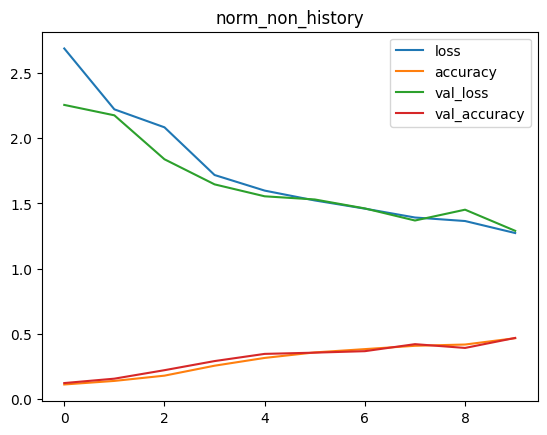

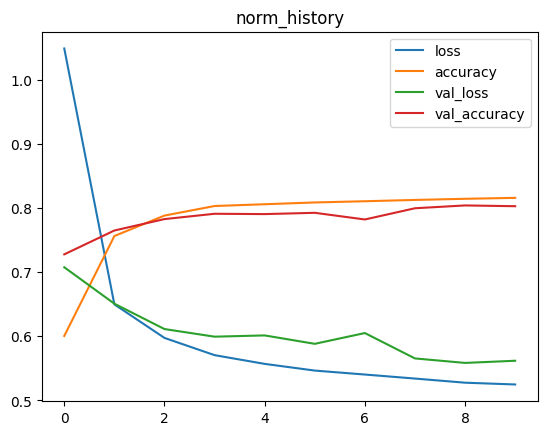

In [135]:
pd.DataFrame(norm_non_history.history).plot(title="norm_non_history")
pd.DataFrame(norm_history.history).plot(title="norm_history")

In [136]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.legacy.Adam(),
                  metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_12.fit(X_train, y_train, epochs=40, callbacks=[lr_scheduler], validation_data=(X_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 1s 499us/step - loss: 1.1165 - accuracy: 0.6197 - val_loss: 0.7580 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 403us/step - loss: 0.6745 - accuracy: 0.7669 - val_loss: 0.6765 - val_accuracy: 0.7648 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 394us/step - loss: 0.6188 - accuracy: 0.7838 - val_loss: 0.6581 - val_accuracy: 0.7590 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 396us/step - loss: 0.5948 - accuracy: 0.7885 - val_loss: 0.6220 - val_accuracy: 0.7791 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 394us/step - loss: 0.5829 - accuracy: 0.7926 - val_loss: 0.6042 - val_accuracy: 0.7872 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 407us/step - loss: 0.5729 - accuracy: 0.7960 - val_loss: 0.6413 - val_accuracy: 0.7703 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

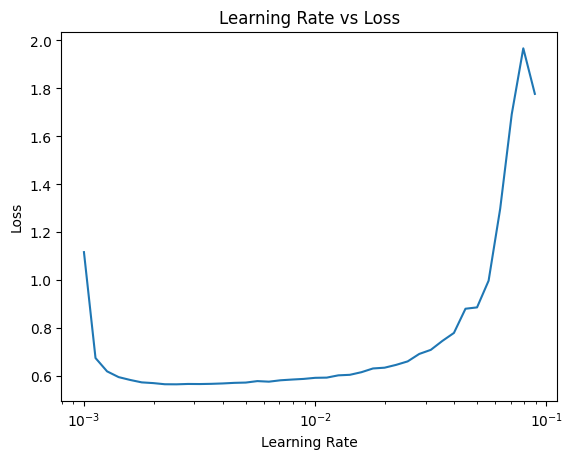

In [137]:
lrs = 1e-3 * (10 ** (tf.range(40)/20))

plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show();


Ideal Learning rate is 0.001, it was used before

In [194]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

model_13.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 1s 434us/step - loss: 1.4868 - accuracy: 0.4242 - val_loss: 1.1527 - val_accuracy: 0.5931
Epoch 2/20
1875/1875 [==============================] - 1s 390us/step - loss: 1.0382 - accuracy: 0.6406 - val_loss: 0.9709 - val_accuracy: 0.6682
Epoch 3/20
1875/1875 [==============================] - 1s 392us/step - loss: 0.8940 - accuracy: 0.6954 - val_loss: 0.8245 - val_accuracy: 0.7273
Epoch 4/20
1875/1875 [==============================] - 1s 391us/step - loss: 0.7727 - accuracy: 0.7360 - val_loss: 0.7532 - val_accuracy: 0.7427
Epoch 5/20
1875/1875 [==============================] - 1s 400us/step - loss: 0.7222 - accuracy: 0.7476 - val_loss: 0.7173 - val_accuracy: 0.7483
Epoch 6/20
1875/1875 [==============================] - 1s 400us/step - loss: 0.6923 - accuracy: 0.7587 - val_loss: 0.7036 - val_accuracy: 0.7492
Epoch 7/20
1875/1875 [==============================] - 1s 407us/step - loss: 0.6736 - accuracy: 0.7626 - val_loss: 0.7232 -

In [203]:
X_test[-2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.64313725, 0.5372549 , 0.50980392, 0.36470588,
        0.53333333, 0.54117647, 0.62352941, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.87058824, 0.73333333, 0.80392157, 0.29411765,
        0.72156863, 0.76862745, 0.90980392, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2627451 , 1.        , 0.8       , 0.90980392, 0.4745098 ,
        0.80784314, 0.8156

In [204]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_13.predict(X_test)

tf.argmax(y_pred[:5], axis=1), tf.argmax(y_test[:5], axis=1)

313/313 [==============================] - 0s 278us/step


(<tf.Tensor: shape=(5,), dtype=int64, numpy=array([9, 2, 1, 1, 6])>,
 <tf.Tensor: shape=(5,), dtype=int64, numpy=array([9, 2, 1, 1, 6])>)

In [209]:
cm = confusion_matrix(tf.argmax(y_test, axis=1), tf.argmax(y_pred, axis=1))

print(cm)

[[772  13   8 125   6   1  63   0  12   0]
 [ 13 939   0  43   1   0   3   0   1   0]
 [ 37   1 496  26 211   0 225   0   4   0]
 [ 55  25   2 832  13   0  46   2  25   0]
 [  2   0  67  70 696   0 128   0  37   0]
 [  0   0   0   4   0 901   2  42   5  46]
 [199   4  78 133 243   0 327   0  16   0]
 [  0   0   0   0   0  49   0 929   0  22]
 [  2   1   1  34  31   3  11   8 909   0]
 [  0   0   0   0   0  23   0  62   2 913]]


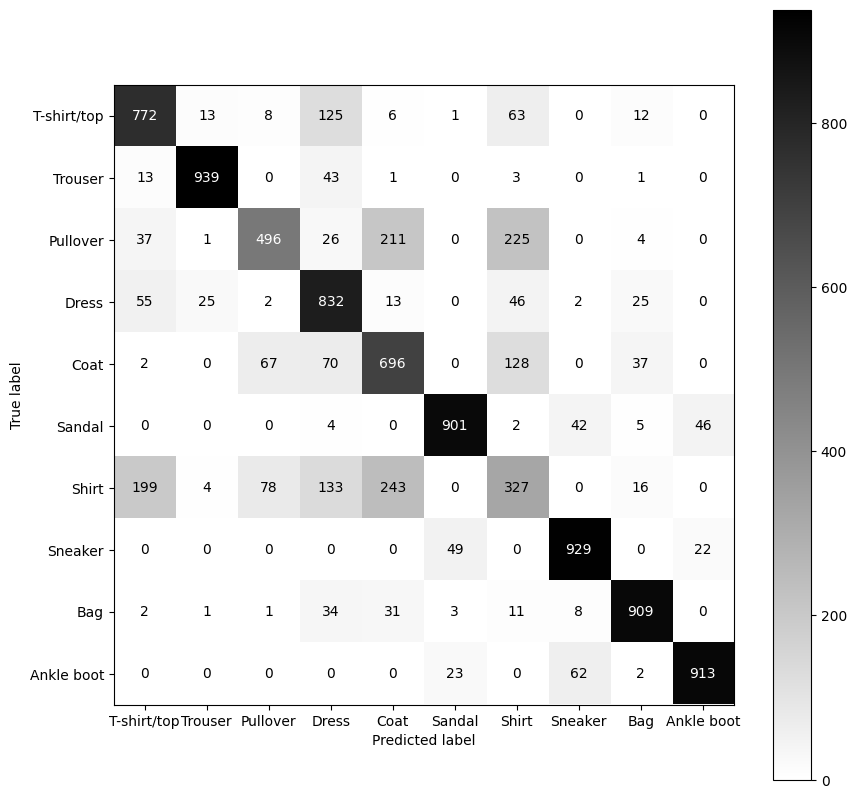

In [226]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)

ConfusionMatrixDisplay(cm, display_labels=labels.values()).plot(cmap=plt.cm.binary, ax=ax);

In [229]:
import random


def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_labels = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label == true_labels:
        color = "green"
    else:
        color = "red"

    plt.xlabel(
        "Pred: {} {:2.0f}% (True: {})".format(
            pred_label, 100 * tf.reduce_max(pred_probs), true_labels
        ),
        color=color,
    )
    plt.show();

1/1 [==============================] - 0s 9ms/step


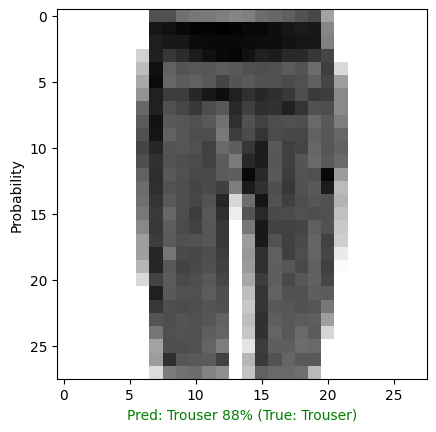

In [244]:
plot_random_image(model_13, X_test, y_test_org, labels)

## What patterns is our model learning?

In [247]:
model_13.layers

In [250]:
weights, biases = model_13.layers[1].get_weights()

In [282]:
y_c_pred = model_13.layers[3].call(model_13.layers[2].call(model_13.layers[1].call(model_13.layers[0].call(X_test))))